# Comparing Logistic Regression Models with and without Principal Component
## Info
- Two datasets: Training.xlsx (n = 519) and test.xlsx (n = 50)
- Variables: 30 predictors (X1, X2,...,X30), all numerical
- 1 response variable (Y) with two classes (0 and 1)
- Test data has missing values for the response variable
## Problem Formulation
- The problem at hand is to apply the knowledge and skills acquiredin data analysis to analyze real data.
- The objective is to interpret the results of the data analysis and present the findings.
- Specifically, we apply LDA,SVM,Logistic Regression to the training dataset for prediction and decide Logistic Regression as our final model because of its smallest overfitting problem.
To solve overfitting problem further ,we use PCA to reduce dimension of data.
- Programming Language used: Python
# Strategy
The strategy is to compare accuracy and sensItivity (Recall) between different models and whether the same model uses PCA accoring to cross validation and find the best model
# Methods
- Logistic regression: a statistical model used to predict binary outcomes by fitting a logistic function to the observed data.
- Linear discriminant analysis: a supervised dimensionality reduction technique that optimally transforms input features to maximize the separation between classes while minimizing within-class variance
- SVM(linear kernel): a supervised machine learning algorithm that separates classes in a
dataset by finding the hyperplane that maximally separates the support vectors, representing instances near the class boundaries.

## 1. Data Processing

In [1]:
cd '/Users/morgen_zhao/Documents/大学/junior/fudamental of Machine LearningI/project'

/Users/morgen_zhao/Documents/大学/junior/fudamental of Machine LearningI/project


In [4]:
#import data and relevant package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import cross_val_score

In [5]:
#import training data and test data
df_train = pd.read_excel("Dataset_Training.xlsx")
df_test = pd.read_excel ("Dataset_Test.xlsx")
##check null value in both datasets
train_null = df_train[df_train.isnull().any(axis=1)].count()
print("train_null\n",train_null) # there are no null values in the training data

train_null
 x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
y      0
dtype: int64


In [6]:
#check outliers
outliers = dict()
for column in df_train.columns:
    Q1,Q3 = df_train[column].quantile(0.25),df_train[column].quantile(0.75)
    IQR = Q3-Q1
    threshold = ((df_train[column] < (Q1 - 2.5 * IQR)) | (df_train[column] > (Q3 + 2.5 * IQR)))
    outliers[column] = df_train[threshold][column].count()
outliers

{'x1': 3,
 'x2': 1,
 'x3': 3,
 'x4': 8,
 'x5': 1,
 'x6': 2,
 'x7': 3,
 'x8': 0,
 'x9': 2,
 'x10': 5,
 'x11': 13,
 'x12': 5,
 'x13': 19,
 'x14': 28,
 'x15': 9,
 'x16': 12,
 'x17': 10,
 'x18': 5,
 'x19': 13,
 'x20': 15,
 'x21': 1,
 'x22': 0,
 'x23': 1,
 'x24': 11,
 'x25': 1,
 'x26': 5,
 'x27': 3,
 'x28': 0,
 'x29': 6,
 'x30': 4,
 'y': 0}

In [7]:
#transform training and test data
X_train = df_train.drop('y',axis = 1)
Y_train = df_train['y']
X_test = df_test.drop('y',axis = 1)
Y_test = df_test['y']

## 2. PCA

In [8]:
#standerization
scaler = StandardScaler(with_std=True, with_mean=True)
X_train_transform_scaled = scaler.fit_transform(X_train)
#fit PCA model
pca = PCA()
pca.fit(X_train_transform_scaled)
pca.explained_variance_ratio_

array([4.43637050e-01, 1.88989845e-01, 9.34796687e-02, 6.62555035e-02,
       5.48727866e-02, 4.10540303e-02, 2.22565829e-02, 1.57293292e-02,
       1.35916724e-02, 1.19061112e-02, 9.92818768e-03, 8.63554330e-03,
       7.87303732e-03, 5.06796722e-03, 3.08758476e-03, 2.63822270e-03,
       2.02932578e-03, 1.78028345e-03, 1.66399354e-03, 1.05086661e-03,
       9.95935918e-04, 9.51484269e-04, 8.21648250e-04, 6.00877884e-04,
       5.31650411e-04, 2.72902870e-04, 2.17100866e-04, 5.12292805e-05,
       2.49609446e-05, 4.61713507e-06])

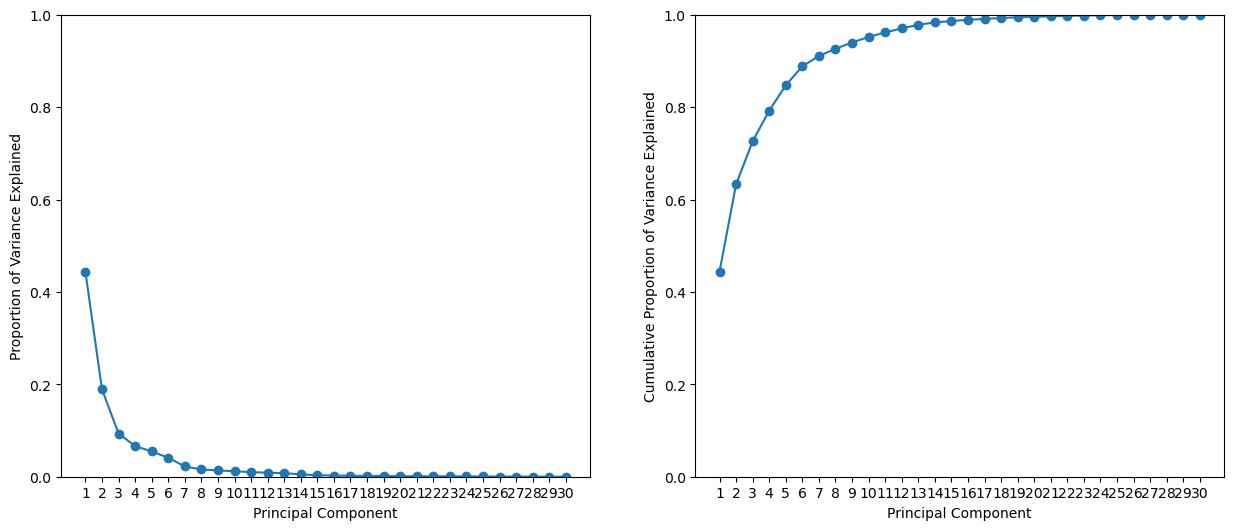

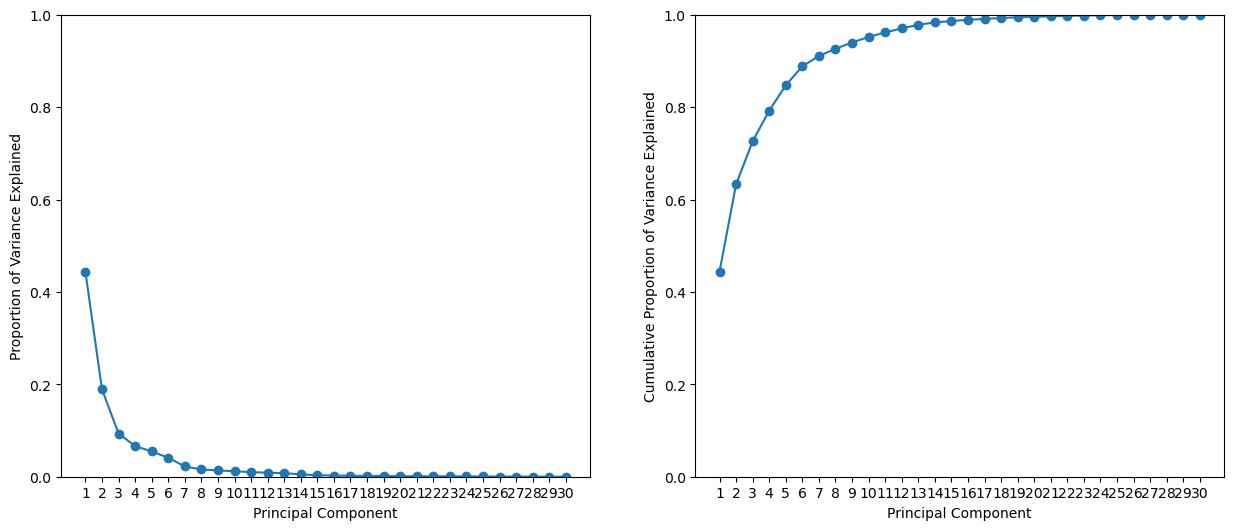

In [26]:
# visualize the relationship between explained variance ratio and the number of p

fig, axes = plt.subplots(1,2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

Text(0, 0.5, 'explained variance ratio')

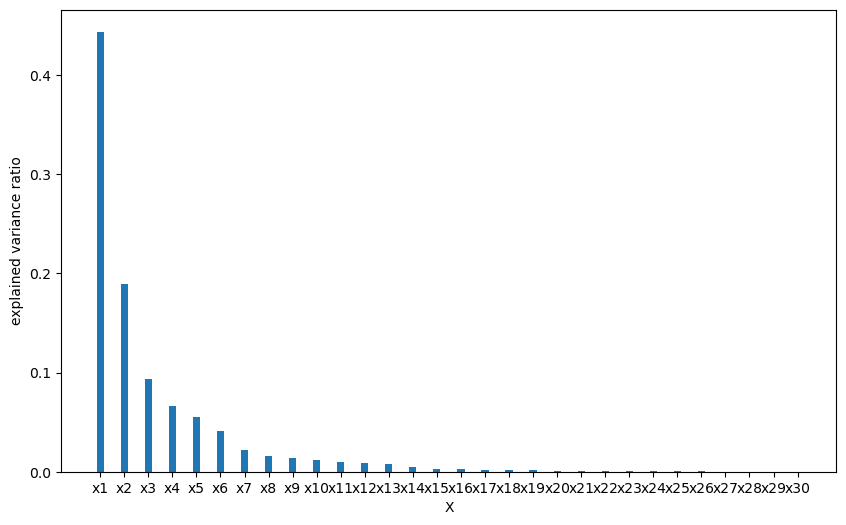

In [27]:
plt.figure(figsize =(10,6))
plt.bar(X_train.columns,pca.explained_variance_ratio_ , width = 0.3)
plt.xlabel('X')
plt.ylabel('explained variance ratio')

In [28]:
#create data_principal and remove outliers from this data set
principal = ['x1','x2','x3','x4','x5','x6','x7','x8']
for column in principal:
    Q1,Q3 = df_train[column].quantile(0.25),df_train[column].quantile(0.75)
    IQR = Q3-Q1
    threshold = ((df_train[column] < (Q1 - 2.5 * IQR)) | (df_train[column] > (Q3 + 2.5 * IQR)))
    df_train = df_train[~threshold]
df_train.shape



(501, 31)

In [29]:
X_train_principal = X_train[principal]
X_test_principal = X_test[principal]

## 3. LDA

In [31]:
#measure LDA model by cross validation
lda_model = LDA()
print ('accuracy senstivity')
cv_accuracy = cross_val_score(lda_model, X_train_principal, Y_train, cv=5, scoring='accuracy')
cv_sensitivity = cross_val_score(lda_model, X_train_principal, Y_train, cv=5, scoring = 'recall')
print(cv_accuracy,cv_sensitivity)

accuracy senstivity
[0.875      0.91346154 0.95192308 0.94230769 0.95145631] [0.95384615 0.96923077 1.         0.98484848 0.95384615]


In [32]:
svm_final_model = SVC(kernel = 'linear',C = 15).fit(X_train_principal,Y_train)
train_pred = svm_final_model.predict(X_train_principal)
print(confusion_matrix(train_pred, Y_train))
print(classification_report(Y_train, train_pred, digits=3))

[[165  11]
 [ 28 315]]
              precision    recall  f1-score   support

           0      0.938     0.855     0.894       193
           1      0.918     0.966     0.942       326

    accuracy                          0.925       519
   macro avg      0.928     0.911     0.918       519
weighted avg      0.925     0.925     0.924       519



## 4. Logistic Regression

In [34]:
logreg_model = LogisticRegression()
print ('accuracy senstivity')
cv_accuracy = cross_val_score(logreg_model, X_train_principal, Y_train, cv=5, scoring='accuracy')
cv_sensitivity = cross_val_score(logreg_model, X_train_principal, Y_train, cv=5,scoring = 'recall')
print(cv_accuracy,cv_sensitivity)

accuracy senstivity


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.86538462 0.91346154 0.92307692 0.93269231 0.91262136] [0.95384615 0.98461538 0.95384615 0.95454545 0.87692308]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [35]:
logreg_final_model = logreg_model.fit(X_train_principal,Y_train)
train_pred = logreg_final_model.predict(X_train_principal)
print(confusion_matrix(train_pred, Y_train))
print(classification_report(Y_train, train_pred, digits=3))

[[161  16]
 [ 32 310]]
              precision    recall  f1-score   support

           0      0.910     0.834     0.870       193
           1      0.906     0.951     0.928       326

    accuracy                          0.908       519
   macro avg      0.908     0.893     0.899       519
weighted avg      0.908     0.908     0.907       519



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#Use all the data in the training dataset to fit the model
logreg_model = LogisticRegression()
print ('accuracy senstivity')
cv_accuracy = cross_val_score(logreg_model, X_train, Y_train, cv=5, scoring='accuracy')
cv_sensitivity = cross_val_score(logreg_model, X_train, Y_train, cv=5, scoring='recall')
print(cv_accuracy,cv_sensitivity)

accuracy senstivity


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.93269231 0.93269231 0.95192308 0.90384615 0.97087379] [0.98461538 0.96923077 0.96923077 0.90909091 0.96923077]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
logreg_final_model = logreg_model.fit(X_train,Y_train)
train_pred = logreg_final_model.predict(X_train)
print(confusion_matrix(train_pred, Y_train))
print(classification_report(Y_train, train_pred, digits=3))

[[176  11]
 [ 17 315]]
              precision    recall  f1-score   support

           0      0.941     0.912     0.926       193
           1      0.949     0.966     0.957       326

    accuracy                          0.946       519
   macro avg      0.945     0.939     0.942       519
weighted avg      0.946     0.946     0.946       519



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
logreg_final_model = logreg_model.fit(X_train_principal,Y_train)
test_pred = logreg_final_model.predict(X_test_principal)
df_test['y'] = test_pred
df_test.to_csv(index=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,y\n13.4,20.52,88.64,556.7,0.1106,0.1469,0.1445,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.01334,0.01705,0.004005,16.41,29.66,113.3,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.1109,1\n13.21,25.25,84.1,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.35,1.314,17.58,0.005768,0.008082,0.0151,0.006451,0.01347,0.001828,14.35,34.23,91.29,632.9,0.1289,0.1063,0.139,0.06005,0.2444,0.06788,1\n14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.01076,0.01171,0.002104,14.91,19.31,96.53,688.9,0.1034,0.1017,0.0626,0.08216,0.2136,0.0671,1\n14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,0.1635,0.05586,0.23,0.669,1.661,20.56,0.003169,0.01377,0.01079,0.005243,0.01103,0.001957,16.22,25.26,105.8,819.7,0.09445,0.2167,0.1565,0.0753,0.2636,0.07676,1\n13.03,18.42,82.61,523.8,